# 数据预处理（回归预测）

## 【任务背景】     
根据因变量的是否连续，有监督学习又分为**回归**和**分类**：
   - 回归：因变量是连续型变量，如：房价，体重等。
   - 分类：因变量是离散型变量，如：是否患癌症，西瓜是好瓜还是坏瓜等。
一般来说，一个完整的机器学习项目分为以下步骤：
   - 明确项目任务：回归/分类
   - 收集数据集并选择合适的特征。
   - 选择度量模型性能的指标。
   - 选择具体的模型并进行训练以优化模型。
   - 评估模型的性能并调参。  
   
本课程将练习处理一个典型的回归预测数据。  
主要应用xgb、lgb、catboost，以及pandas、numpy、matplotlib、seabon、sklearn、keras等等数据挖掘常用库或者框架来进行数据挖掘任务。    
课程将探索性分析和数据预处理合二为一，在熟悉数据的过程中进行清洗和处理。    

作为数据分析的基础，业务理解是极其重要的，对于业务的理解甚至会影响后续的特征工程构建以及模型的选择，最主要是会影响后续发展工作的方向，比如挖掘特征的方向或者存在问题解决问题的方向，了解业务背后的思想以及业务逻辑，也很有利于花费更少时间构建更为有效的特征模型。业务理解要达到的地步是，把一个数据分析转化为一种宏观理解的解决思路。

- 1） 业务理解究竟是理解什么：    
  理解业务是不是把一个数据集的字段说明读一遍就行的事情。理解业务其实也是从直观上梳理问题，分析问题是否可行的方法，有多少可行度，数据分析做的价值大不大，理清数据之间的关系要从背后的业务背景引发的探索任务理解其中的任务逻辑，可能对于业务有意义的外在数据有哪些，并对于数据集有一个初步了解，知道现在和任务的相关数据有哪些，其中数据之间的关联逻辑是什么样的。 不同的问题，在处理方式上的差异是很大的。如果用简短的话来说，就是该数据集符合的问题是什么问题，大概要去用哪些指标，是否对很多原始特征有很深刻的了解，并且可以通过EDA来寻求他们直接的关系，最后构造出满意的特征。    
- 2） 有了业务理解后能做什么：    
  在对于业务有了一定的了解后，分析清楚了问题的类型性质和对于数据理解的这一基础上，是不是业务理解就做完了呢? 并不是的，就像摸清了敌情后，我们至少就要有一些相应的理解分析，比如这个数据分析的难点可能在哪里，关键点可能在哪里，哪些地方可以挖掘更好的特征，用什么样得线下验证方式更为稳定，哪些数据是可靠的，哪些数据是需要精密的处理的，哪部分数据应该是关键数据（比如风电数据，如果机组比较邻近，相关一些风速，转速特征是否会很近似）。这时是在一个宏观的大体下分析的，有助于摸清整个数据集的思路脉络，以及后续的分析方向。    
- 3） 评价指标：    
  不同的指标对于同样的预测结果是具有误差敏感的差异性的，比如AUC，logloss, MAE，RSME，或者一些特定的评价函数。是会有很大可能会影响后续一些预测的侧重点。    
- 4） 业务中可能潜在隐藏的条件：
  比如对于数据异常的识别处理，比如工序流程的差异性，比模型的鲁棒性，有些思考是可以贯穿数据预处理、特征工程、建模调参以及后续处理的，也有些会对于特征构建或者选择模型上有很大益处，反过来如果在模型预测效果不好，其实有时也要反过来思考，是不是业务背景有没有哪方面理解不清晰或者什么其中的问题没考虑到。

## 【任务描述】   
  
数据预处理与特征工程实践操作：  
1. 熟练掌握数据预处理的基本流程和方法。       
2. 学会根据实际需求选择合适的数据预处理方法。    
3. 能够分析和解决数据预处理过程中出现的问题。  

1. 载入各种数据科学以及可视化库:    
   - 数据科学库 pandas、numpy、scipy；    
   - 可视化库 matplotlib、seabon；    
   - 其他；    
2. 载入数据：     
   - 载入训练集和测试集；    
   - 简略观察数据(head()+shape)；    
3. 数据总览:    
   - 通过describe()来熟悉数据的相关统计量    
   - 通过info()来熟悉数据类型    
4. 判断数据缺失和异常    
   - 查看每列的存在nan情况    
   - 异常值检测    
5. 特征分为类别特征和数字特征，并对类别特征查看unique分布    


## 【任务准备】    
1. 学员已完成数据探索性分析实践课程，掌握pandas、Matplotlib、Seaborn、sklearn等数据分析常用库的基本使用。    
2. 准备好用于实践的数据集（本次使用经典的泰坦尼克生存预测数据集）。

## 【任务实施】 
### 步骤 1: 启动Jupyter Notebook    
+ 在搜索栏输入"cmd"命令，启动命令提示符窗口。    
+ 输入"jupyter notebook"命令，并按回车键启动Jupyter Notebook。   
    
### 步骤 2: 创建新的Notebook    
+ 在Jupyter的Web界面中，点击右上角的 "New" 按钮。    
+ 选择 "Python 3"内核来创建一个新的Python 3 Notebook。    
    
### 步骤 3: 导入必要的库
+ 我们通常使用numpy和pandas库来进行数据清洗，使用sklearn库来进行数据的分类、离散化等特征处理和特征选择，使用matplotlib、seaborn和missingno来进行数据的可视化。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 定义字体，在图表中正常显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']
# 在图表中正常显示负号
plt.rcParams['axes.unicode_minus'] = False

#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

### 步骤 4: 导入数据集    
该数据来自某交易平台的二手车交易记录，总数据量超过40w，包含31列变量信息，其中15列为匿名变量。本数据集为某数据竞赛真实赛题数据，从上述二手车交易记录中抽取15万条作为训练集，5万条作为测试集A，同时对name、model、brand和regionCode等信息进行脱敏。    
一般而言，对于数据在比赛界面都有对应的数据概况介绍（匿名特征除外），说明列的性质特征。了解列的性质会有助于我们对于数据的理解和后续分析。匿名特征，就是未告知数据列所属的性质的特征列。    
- name - 汽车编码    
- regDate - 汽车注册时间    
- model - 车型编码    
- brand - 品牌    
- bodyType - 车身类型    
- fuelType - 燃油类型    
- gearbox - 变速箱    
- power - 汽车功率    
- kilometer - 汽车行驶公里    
- notRepairedDamage - 汽车有尚未修复的损坏    
- regionCode - 看车地区编码    
- seller - 销售方    
- offerType - 报价类型    
- creatDate - 广告发布时间    
- price - 汽车价格    
- v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'（根据汽车的评论、标签等大量信息得到的embedding向量）【人工构造 匿名特征】    
数字全都脱敏处理，都为label encoding形式，即数值形式。    

In [2]:
# 用Pandas导入CSV文件
train = pd.read_csv('used_car_train.csv')
test = pd.read_csv('used_car_testA.csv')
train

,SaleID name regDate model brand bodyType fuelType gearbox power kilometer notRepairedDamage regionCode seller offerType creatDate price v_0 v_1 v_2 v_3 v_4 v_5 v_6 v_7 v_8 v_9 v_10 v_11 v_12 v_13 v_14
0,0 736 20040402 30.0 6 1.0 0.0 0.0 60 12.5 0.0 ...
1,1 2262 20030301 40.0 1 2.0 0.0 0.0 0 15.0 - 43...
2,2 14874 20040403 115.0 15 1.0 0.0 0.0 163 12.5...
3,3 71865 19960908 109.0 10 0.0 0.0 1.0 193 15.0...
4,4 111080 20120103 110.0 5 1.0 0.0 0.0 68 5.0 0...
...,...
149995,149995 163978 20000607 121.0 10 4.0 0.0 1.0 16...
149996,149996 184535 20091102 116.0 11 0.0 0.0 0.0 12...
149997,149997 147587 20101003 60.0 11 1.0 1.0 0.0 90 ...
149998,149998 45907 20060312 34.0 10 3.0 1.0 0.0 156 ...


要养成看数据集的head()以及shape的习惯，这会让你每一步更放心，导致接下里的连串的错误, 如果对自己的pandas等操作不放心，建议执行一步看一下，这样会有效的方便你进行理解函数并进行操作。

可以看到数据读取出现问题，没有得到我们想要的二维表格。原因是特征名之间以空格间隔，而pandas的read_csv默认分隔符号为逗号。此时需要显式指定数据之间的分隔符为空格。

In [3]:
train = pd.read_csv('used_car_train.csv', sep=' ')
test = pd.read_csv('used_car_testA.csv', sep=' ')
train

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [5]:
test

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353


### 步骤 5: 数据统计信息浏览       
5.1 使用info()函数观察数据列名和缺失值

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

可以看到大部分都是数值型数据，只有notRepairedDamage为非数值类型。放进模型的数据应该都是数值型，非数值型需要进行一些转化。

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

5.2 使用describe()函数查看数值型数据的统计信息    
+ describe种有每列的统计量，个数count、平均值mean、方差std、最小值min、中位数25% 50% 75% 、以及最大值 看这个信息主要是瞬间掌握数据的大概的范围以及每个值的异常值的判断，比如有的时候会发现999 9999 -1 等值这些其实都是nan的另外一种表达方式，有的时候需要注意下。    
+ info 通过info来了解数据每列的type，有助于了解是否存在除了nan以外的特殊符号异常。    

In [6]:
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [7]:
test.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


### 步骤 6: 判断数据缺失和异常       
6.1 使用isnull()函数查看每列的存在nan情况

In [9]:
train.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [10]:
test.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

<AxesSubplot:>

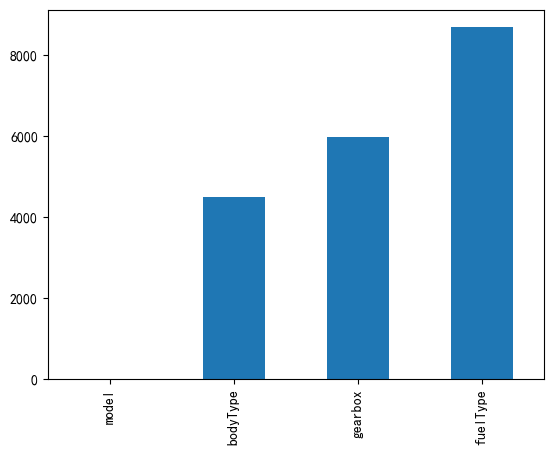

In [7]:
# 可视化查看缺省值
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

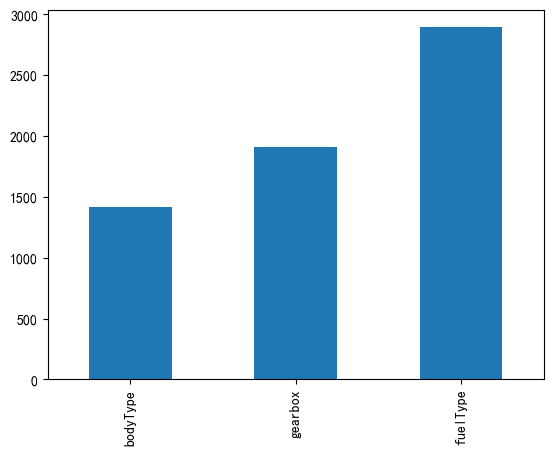

In [8]:
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

通过以上两句可以很直观的了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于 nan存在的个数是否真的很大，如果很小一般选择填充，如果使用lgb等树模型可以直接空缺，让树自己去优化，但如果nan存在的过多、可以考虑删掉。

<AxesSubplot:>

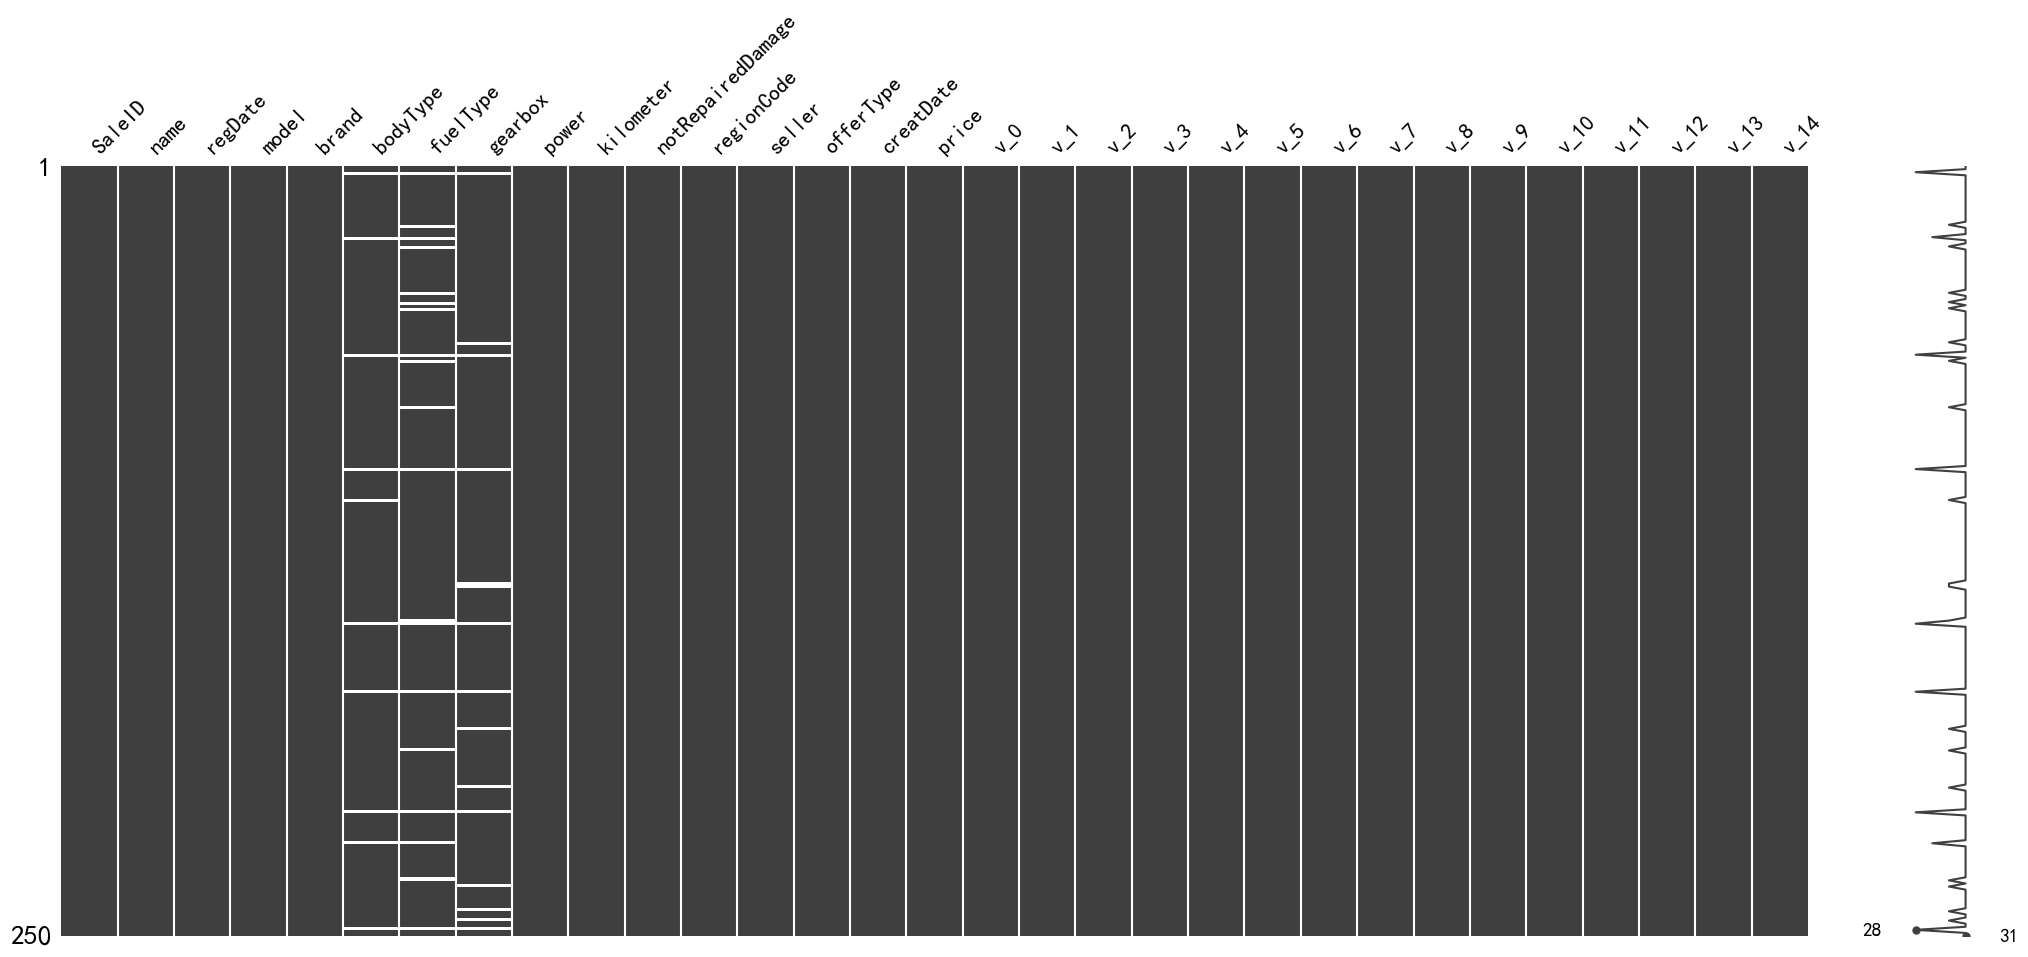

In [12]:
msno.matrix(train.sample(250))

<AxesSubplot:>

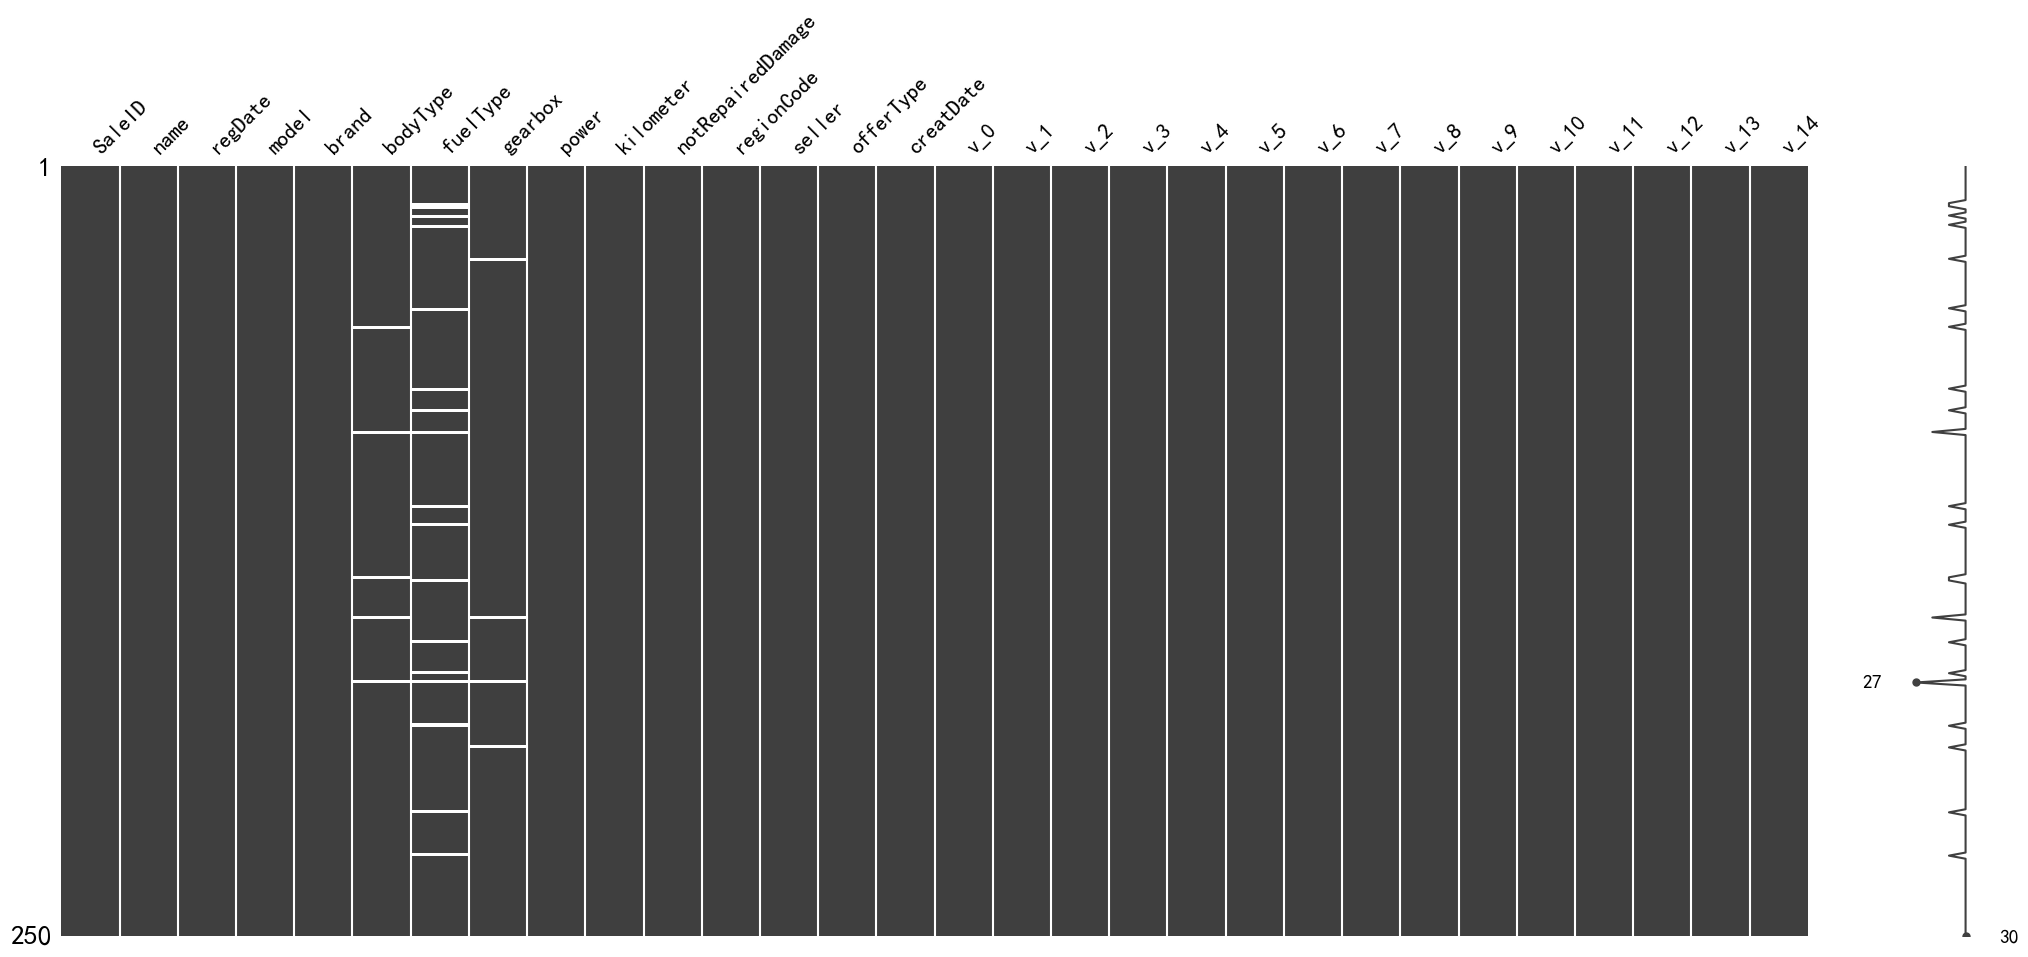

In [13]:
msno.matrix(test.sample(250))

测试集的缺省和训练集的差不多情况, 可视化有四列有缺省，notRepairedDamage缺省得最多。

6.2 使用value_counts()函数查看所有出现的值，从而找出异常值。

In [14]:
train['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [15]:
test['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

可以看出来‘ - ’也为空缺值，这里我们直接替换成nan。注意nan在value_counts()中是不显示出来的。

In [4]:
train['notRepairedDamage'].replace('-', np.nan, inplace=True)
train['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [5]:
test['notRepairedDamage'].replace('-', np.nan, inplace=True)
test['notRepairedDamage'].value_counts()

0.0    37249
1.0     4720
Name: notRepairedDamage, dtype: int64

In [11]:
# 再次查看空缺值
train.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [12]:
test.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage    8031
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

以下两个类别特征严重倾斜，一般不会对预测有什么帮助，可以删掉。

In [24]:
train["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [26]:
test["seller"].value_counts()

0    50000
Name: seller, dtype: int64

In [25]:
train["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

In [21]:
test["offerType"].value_counts()

0    50000
Name: offerType, dtype: int64

### 步骤 7: 查看特征数据类型及类型转换     
大部分模型都只能输入数值型数据。我们需要查看特征数据类型，根据数据特性将非数值类型的特征转换为数值型。

In [6]:
# 分离数据特征和类型特征
# 数字特征
train_numeric = train.select_dtypes(include=[np.number])
test_numeric = test.select_dtypes(include=[np.number])
del train_numeric['price']
print('数值特征：',train_numeric.columns)
# 非数值特征
train_categorical = train.select_dtypes(include=[np.object])
test_categorical = test.select_dtypes(include=[np.object])
print('非数值特征：',train_categorical.columns)

数值特征： Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
       'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')
非数值特征： Index(['notRepairedDamage'], dtype='object')


可以看到，类型特征只有notRepairedDamage一列。该特征经过清洗，已经完全变成了数值和空缺值，可以转换为数字特征。

In [7]:
train['notRepairedDamage'] = train['notRepairedDamage'].astype('float')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  125676 non-null  float64
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [8]:
test['notRepairedDamage'] = test['notRepairedDamage'].astype('float')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  41969 non-null  float64
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

### 步骤 8: 查看百分位数及替换异常值       
使用统计值中的百分位数替换过大或者过小的异常值，使数据更加平滑。    
注意数据平滑处理仅对训练数据进行，测试数据不处理。

In [9]:
# 将异常值替换为5%和95%分位数
df_describe = train.describe(percentiles=[.05,.5,.95] , include='all') # 查看5%和95%分位数值
df_col = ['power'] # 需要清洗的数值列列表，可以循环处理多列
for col in df_col:
    train[col].clip(lower = df_describe.loc['5%',col], upper = df_describe.loc['95%',col],inplace=True)

### 步骤 9: 保存清洗完成的数据

In [10]:
train.to_csv('used_car_train_clean.csv',index=False)
test.to_csv('used_car_test_clean.csv',index=False)

## 【任务总结】  
本课程需要重点关注以下知识点：
1. 格式转换：例如表格中的数值型、类别型、时间型等特征。    
2. 数据清洗：去除重复、异常值、缺失值等，使数据更加准确可靠。         
3. 根据实际需求选择合适的数据预处理方法。    
4. 数据预处理过程中异常值、缺失值的处理方法。